In [ ]:
from  google.colab import drive  
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/econ4130

Mounted at /content/drive
/content/drive/My Drive/econ4130
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/econ4130


In [ ]:
### save and load data using pickle
import pickle
def psave(dataframe, fname):
    with open('{}.pkl'.format(fname),'wb') as pickle_file:
        pickle.dump(dataframe,pickle_file)
        
def pload(fname):
    with open('{}.pkl'.format(fname),'rb') as pickle_file:
        dataframe=pickle.load(pickle_file)
        return dataframe

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)

     |████████████████████████████████| 911kB 12.6MB/s 
Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:12 https://developer.download.nvidia.com/compute/machi

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
###scrap US bond yield data from 1999 to 2020 using BeautifulSoup
import requests
from bs4 import BeautifulSoup
import re
def get_rates(url):
  page = requests.get(url)
  soup = BeautifulSoup(page.content,'html.parser')
  yield_rates = soup.find_all('td',class_='text_view_data')
  i=0
  for rate in yield_rates:
    if i%13==0 and rate.text[6]=='9':
      dates.append('19'+rate.text[6:]+'-'+rate.text[:2]+'-'+rate.text[3:5])
    elif i%13==0 and rate.text[6]!='9':
      dates.append('20'+rate.text[6:]+'-'+rate.text[:2]+'-'+rate.text[3:5])
    else:
      try:
        M[(i%13)-1].append(float(rate.text))
      except:
        M[(i%13)-1].append(np.nan)
    i+=1


In [ ]:
url='https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year='
years=[i for i in range(1999,2021)]
M=[[],[],[],[],[],[],[],[],[],[],[],[]]
dates=[]

for year in years:
  url1=url+str(year)
  get_rates(url1)
 

<Figure size 432x288 with 0 Axes>

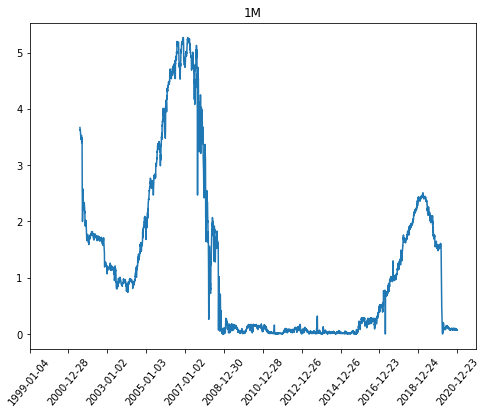

<Figure size 432x288 with 0 Axes>

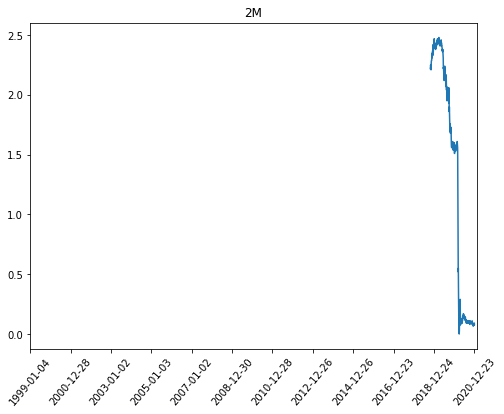

<Figure size 432x288 with 0 Axes>

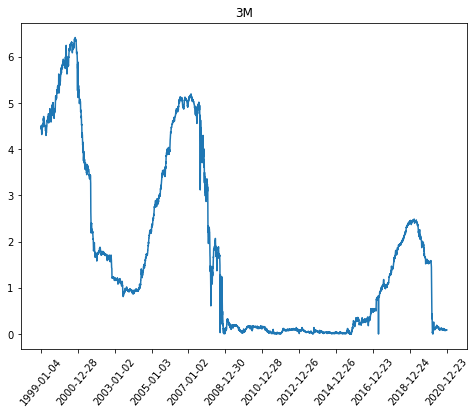

<Figure size 432x288 with 0 Axes>

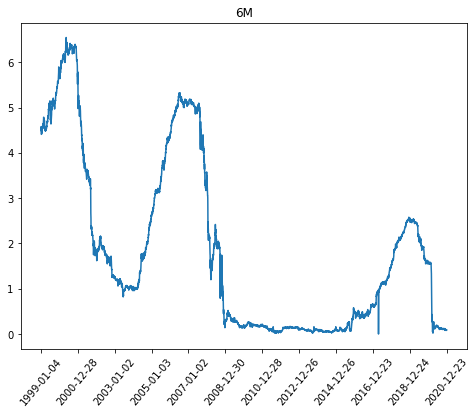

<Figure size 432x288 with 0 Axes>

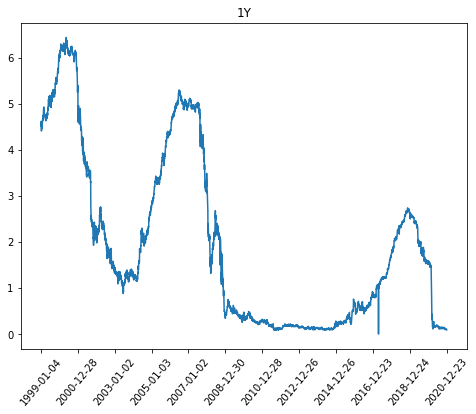

<Figure size 432x288 with 0 Axes>

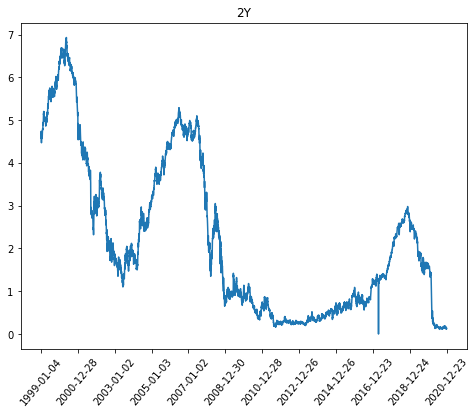

<Figure size 432x288 with 0 Axes>

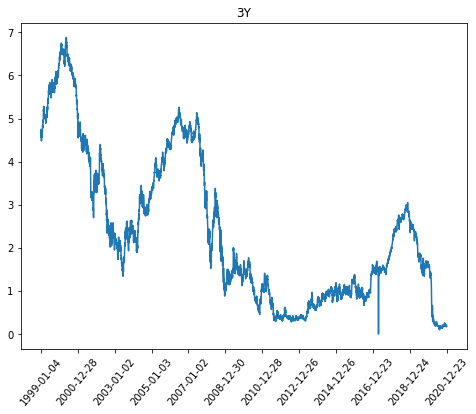

<Figure size 432x288 with 0 Axes>

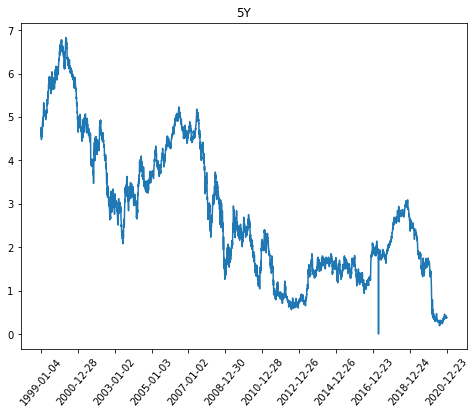

<Figure size 432x288 with 0 Axes>

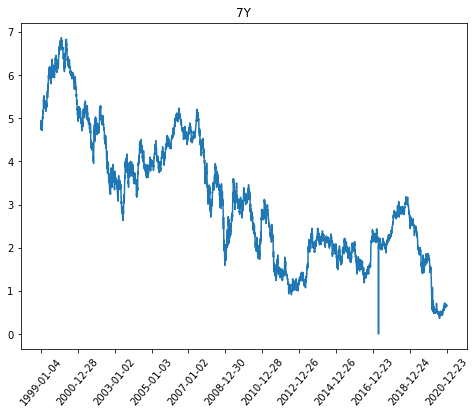

<Figure size 432x288 with 0 Axes>

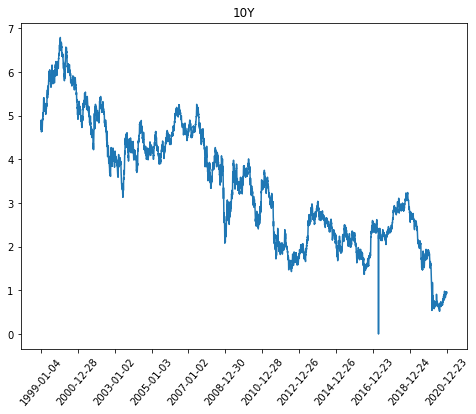

<Figure size 432x288 with 0 Axes>

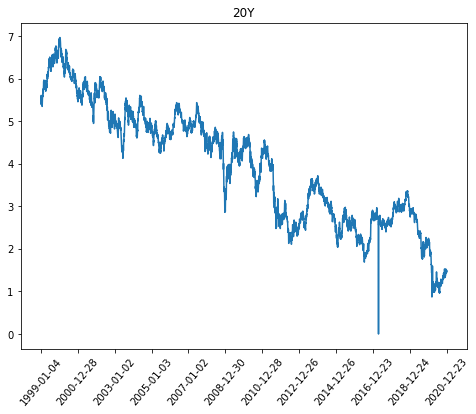

<Figure size 432x288 with 0 Axes>

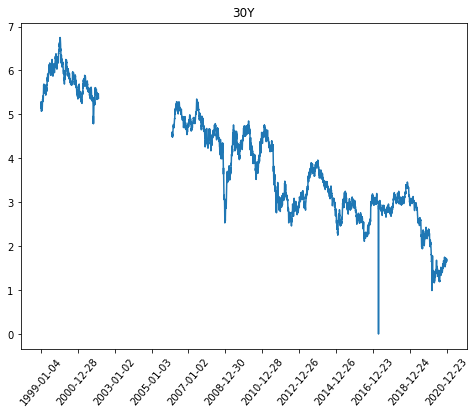

In [ ]:
columns=['1M','2M','3M','6M','1Y','2Y','3Y','5Y','7Y','10Y','20Y','30Y']
DICT={}
for i in range(12):
  DICT[columns[i]]=M[i]
df=pd.DataFrame(DICT,index=dates)

##print all data out
import matplotlib.pyplot as plt
def plot(i,l):
  plt.figure(i)
  plt.figure( figsize=(8, 6))
  plt.plot(dates,df[l])
  plt.xticks([dates[i] for i in range(0,len(dates),500)],rotation=50)
  plt.title(l)
  plt.show()
  i+=1
  return i

i=0
for l in columns:
  t=plot(i,l)

In [ ]:
##find invald rows of the sudden drop to 0
for row in range(df['1Y'].shape[0]): # df is the DataFrame
             if df['1Y'].iloc[row] == 0:
                 print(row)


4576


In [ ]:
print(df.iloc[4576])
print(dates[4576])


1M     0.0
2M     NaN
3M     0.0
6M     0.0
1Y     0.0
2Y     0.0
3Y     0.0
5Y     0.0
7Y     0.0
10Y    0.0
20Y    0.0
30Y    0.0
Name: 2017-04-14, dtype: float64
2017-04-14


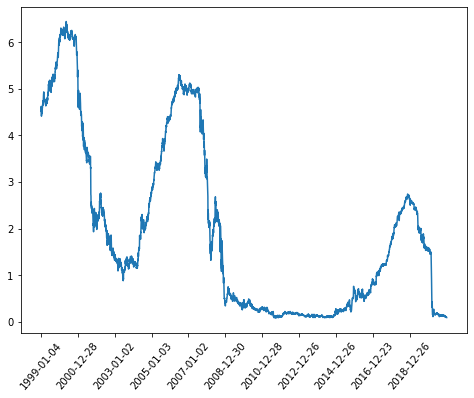

              1M    2M    3M    6M    1Y  ...    5Y    7Y   10Y   20Y   30Y
1999-01-04   NaN   NaN  4.49  4.57  4.58  ...  4.57  4.75  4.69  5.42  5.15
1999-01-05   NaN   NaN  4.48  4.57  4.56  ...  4.62  4.80  4.74  5.48  5.21
1999-01-06   NaN   NaN  4.47  4.55  4.53  ...  4.61  4.76  4.73  5.42  5.17
1999-01-07   NaN   NaN  4.44  4.49  4.51  ...  4.62  4.82  4.77  5.48  5.23
1999-01-08   NaN   NaN  4.48  4.53  4.57  ...  4.72  4.92  4.86  5.57  5.26
...          ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...
2020-12-17  0.08  0.09  0.08  0.09  0.09  ...  0.38  0.66  0.94  1.47  1.68
2020-12-18  0.08  0.08  0.08  0.09  0.09  ...  0.39  0.67  0.95  1.49  1.70
2020-12-21  0.08  0.09  0.09  0.09  0.09  ...  0.39  0.66  0.95  1.48  1.68
2020-12-22  0.07  0.09  0.09  0.09  0.09  ...  0.37  0.64  0.93  1.45  1.65
2020-12-23  0.07  0.08  0.09  0.09  0.09  ...  0.38  0.67  0.96  1.49  1.70

[5500 rows x 12 columns]


In [ ]:
###drop the sudden 0 row
del dates[4576]
df1=df.drop(index='2017-04-14')
plt.figure( figsize=(8, 6))
plt.plot(dates,df1['1Y'])
plt.xticks([dates[i] for i in range(0,len(dates),500)],rotation=50)
plt.show()
print(df1)

In [ ]:
##save target data to google drive
psave(df1,'DV_FROM19999TO2020')


<Figure size 432x288 with 0 Axes>

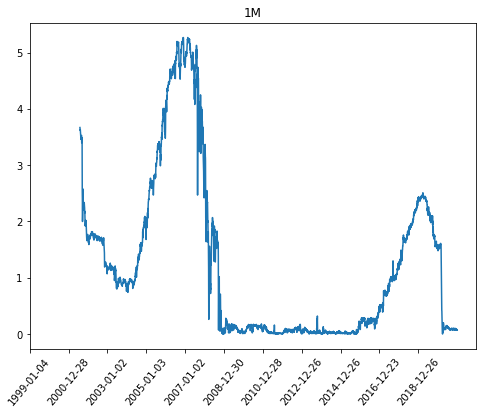

<Figure size 432x288 with 0 Axes>

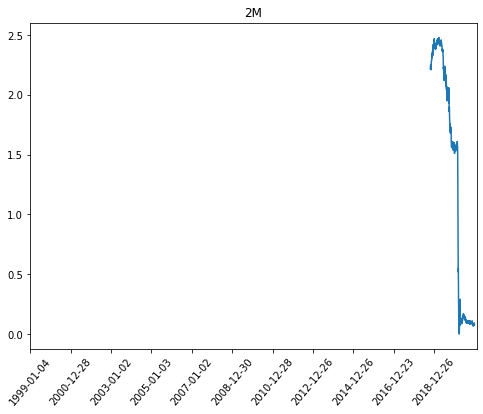

<Figure size 432x288 with 0 Axes>

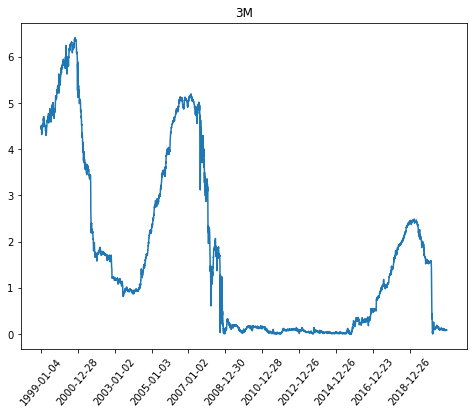

<Figure size 432x288 with 0 Axes>

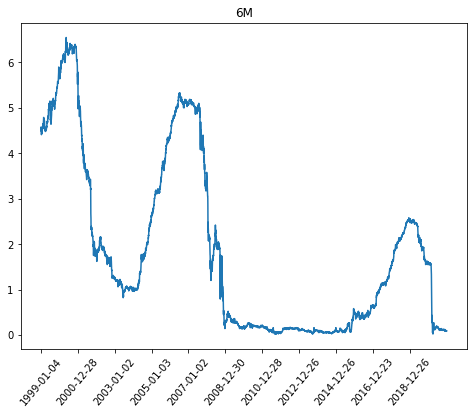

<Figure size 432x288 with 0 Axes>

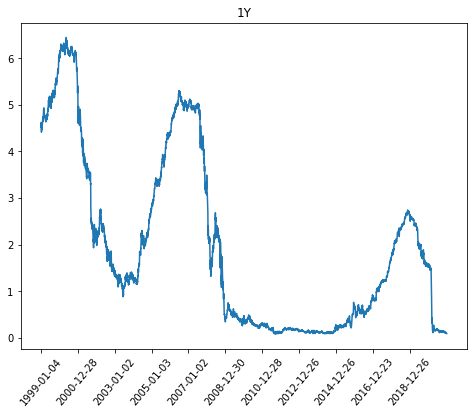

<Figure size 432x288 with 0 Axes>

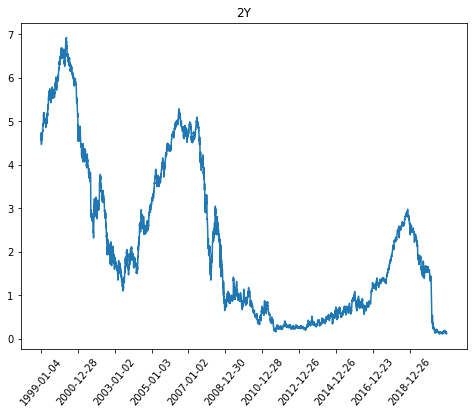

<Figure size 432x288 with 0 Axes>

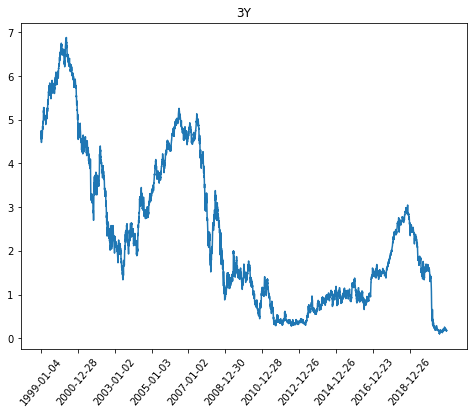

<Figure size 432x288 with 0 Axes>

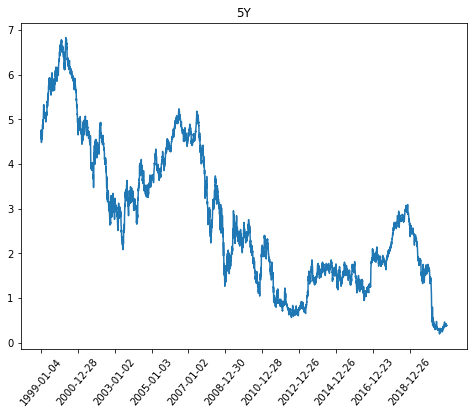

<Figure size 432x288 with 0 Axes>

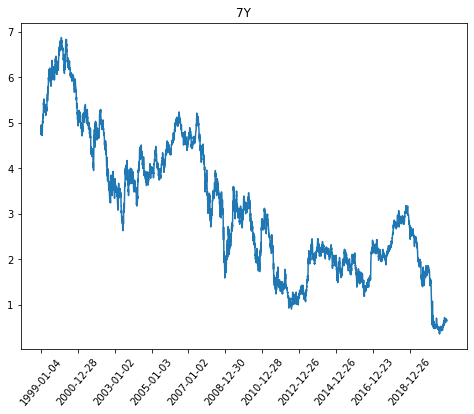

<Figure size 432x288 with 0 Axes>

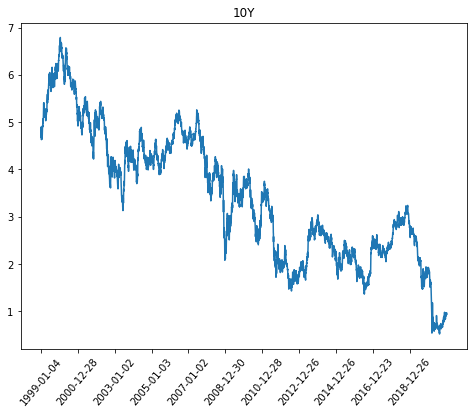

<Figure size 432x288 with 0 Axes>

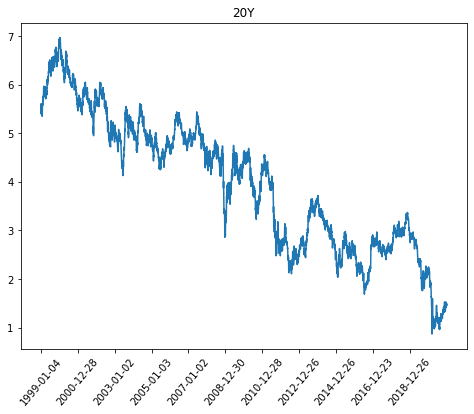

<Figure size 432x288 with 0 Axes>

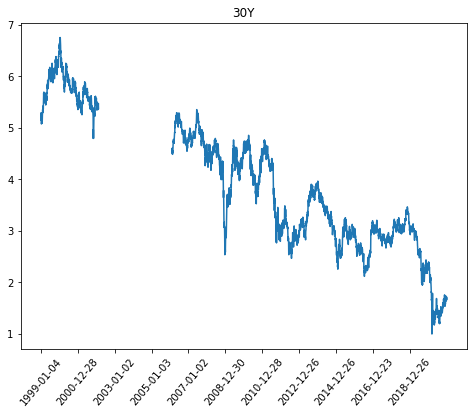

In [ ]:
import matplotlib.pyplot as plt
def plot(i,l):
  plt.figure(i)
  plt.figure( figsize=(8, 6))
  plt.plot(dates,pload('DV_FROM19999TO2020')[l])
  plt.xticks([dates[i] for i in range(0,len(dates),500)],rotation=50)
  plt.title(l)
  plt.show()
  i+=1
  return i

i=0
for l in columns:
  t=plot(i,l)

In [ ]:
import pandas_datareader as web
import datetime
#30Y has a large gap, get 30-year yield data from fred
names= ['DGS30']
import datetime

start = datetime.datetime(1999, 1, 1)
data=web.DataReader(names, 'fred', start)


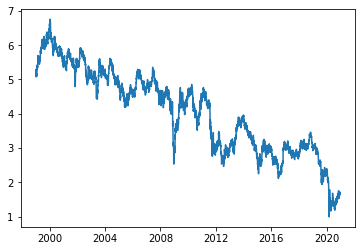

In [ ]:
import pandas as pd
df=pload('DV_FROM19999TO2020')
###merge data according to the index of the df on the left
df1=pd.merge(df,data,how='left',left_index=True,right_index=True)
df1=df1.drop(columns='30Y')
df1=df1.rename(columns={'DGS30':'30Y'})
plt.plot(df1.index,df1['30Y'])

In [ ]:
psave(df1,'DV_FROM19999TO2020')